In [1]:
import math 
import matplotlib.pyplot as plt
import numpy as np 
import torch 
from torch.autograd import Variable
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim

In [3]:
plt.rcParams['figure.figsize'] = (8, 8)

## Generate Data 

### y = x + 0.3 * sin (2pix) + noise

In [4]:
n = 2500
d = 1
t = 1
x_train = np.random.uniform(0, 1, (n, d)).astype(np.float32)
noise = np.random.uniform(-0.1, 0.1, (n, d)).astype(np.float32)
y_train = x_train + 0.3*np.sin(2*np.pi*x_train) + noise
x_test = np.linspace(0, 1, n).reshape(-1, 1).astype(np.float32)

In [6]:
x_train.shape

(2500, 1)

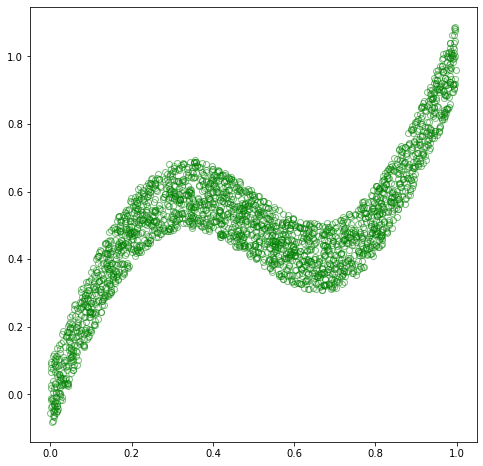

In [11]:
fig = plt.figure(figsize=(8, 8))
plt.plot(x_train, y_train, 'go', alpha=0.5, markerfacecolor='none')
plt.show()

In [12]:
h = 15 
w1 = Variable(torch.randn(d, h) * np.sqrt(1/d), requires_grad=True)
b1 = Variable(torch.zeros(1, h), requires_grad=True)
w2 = Variable(torch.randn(h, t) * np.sqrt(1/h), requires_grad=True)
b2 = Variable(torch.zeros(1, t), requires_grad=True) 

def forward(x):
    out = torch.tanh(x.mm(w1) + b1)
    out = out.mm(w2) + b2 
    return out

In [14]:
print(w1.shape, b1.shape)

torch.Size([1, 15]) torch.Size([1, 15])


In [15]:
x = Variable(torch.from_numpy(x_train))
y = Variable(torch.from_numpy(y_train))

opt = optim.SGD([w1, b1, w2, b2], lr = 0.09, momentum = 0.9, nesterov = True)

In [17]:
for epoch in range(2000):
    opt.zero_grad()
    out = forward(x)
    loss = F.mse_loss(out, y)
    if epoch % 100 == 0:
        print(epoch, loss.item())
    loss.backward()
    opt.step()

0 0.034734368324279785
100 0.02035910077393055
200 0.019083373248577118
300 0.017214272171258926
400 0.014055763371288776
500 0.009350869804620743
600 0.00552682438865304
700 0.004326872993260622
800 0.005120884161442518
900 0.004413831513375044
1000 0.00416537094861269
1100 0.003997362684458494
1200 0.003871016204357147
1300 0.003774201264604926
1400 0.003699058201164007
1500 0.003640059381723404
1600 0.0035932553000748158
1700 0.003555781440809369
1800 0.0035255313850939274
1900 0.0035009330604225397


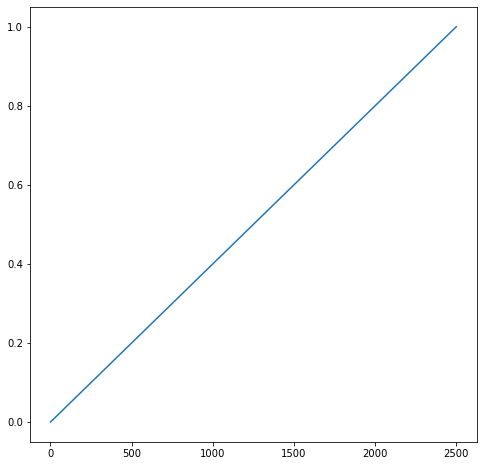

In [18]:
plt.plot(x_test)

In [19]:
out = forward(Variable(torch.from_numpy(x_test)))

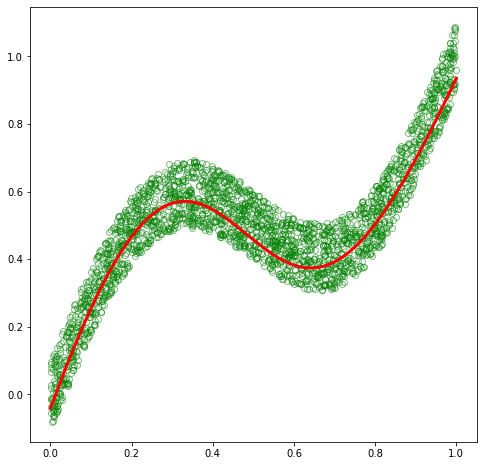

In [20]:
fig = plt.figure(figsize=(8, 8))
plt.plot(x_train, y_train, 'go', alpha=0.5, markerfacecolor='none')
plt.plot(x_test, out.data.numpy(), 'r', linewidth=3.0)
plt.show()